In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [18]:
df = pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2001050.csv")

In [19]:
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB


In [21]:
#checking for missing values
df.isnull().sum()/len(df)*100

Country Code      0.000000
Region           18.113208
IncomeGroup      18.490566
SpecialNotes     52.075472
TableName         0.000000
Unnamed: 5      100.000000
dtype: float64

In [22]:
#dropping rows with missing values
df.dropna(subset=['Region','IncomeGroup'],axis=0,how='any',inplace=True)

In [23]:
#dropping unnecessary columns
df.drop(columns = ['SpecialNotes','Unnamed: 5'],inplace=True)

In [24]:
#checking for missing values
df.isnull().sum()/len(df)*100

Country Code    0.0
Region          0.0
IncomeGroup     0.0
TableName       0.0
dtype: float64

In [25]:
# one-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns= ['IncomeGroup'])

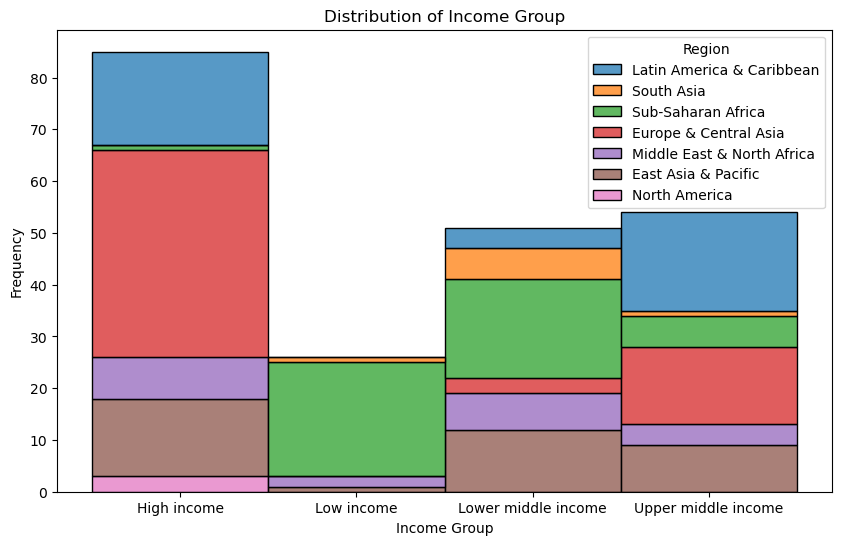

In [35]:
# Distribution of IncomeGroup
plt.figure(figsize=(10, 6))
sns.histplot(df,x=df['IncomeGroup'], hue= df['Region'],multiple="stack")
plt.title('Distribution of Income Group')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.show()